########################

Shells that start like this one (Refering to the first line) are added subsequentlyto the deadline.

This notebook will predict the new cases for the next few days from the 20-12-2020 as it was required of the assinement.

If you want you can look the prediction past that date change the variable below.

In [1]:
########################
Last_data_date = '2020-12-20'

# Importing the data and the modules that we will use

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl # to draw pretty graphs
import matplotlib.pyplot as plt # to draw pretty graphs
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import sys #For the error messages

In [3]:
dataset = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
countryData = dataset[dataset["location"] == "Greece"]

googlemobilitydata = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv")
countrygooglemobilitydata = googlemobilitydata[googlemobilitydata["country_region"] == "Greece"]
countrygooglemobilitydata = countrygooglemobilitydata.groupby(['date']).mean()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
########################
rows_we_wont_use = countryData.index[countryData['date'] > Last_data_date].tolist()

countryData = countryData.drop(rows_we_wont_use)
countryData['date'].tail()

69787    2020-12-16
69788    2020-12-17
69789    2020-12-18
69790    2020-12-19
69791    2020-12-20
Name: date, dtype: object

In [5]:
########################
#countrygooglemobilitydata["id"] = np.arange(-60,(countrygooglemobilitydata.shape[0] - 60))
#countrygooglemobilitydata.set_index("id", inplace=True)
countrygooglemobilitydata = countrygooglemobilitydata.reset_index(level=0)

rows_we_wont_use_2 = countrygooglemobilitydata.index[countrygooglemobilitydata['date'] > Last_data_date].tolist()

countrygooglemobilitydata = countrygooglemobilitydata.drop(rows_we_wont_use_2)
countrygooglemobilitydata['date'].tail()

305    2020-12-16
306    2020-12-17
307    2020-12-18
308    2020-12-19
309    2020-12-20
Name: date, dtype: object

In [6]:
countryData = countryData[:][36:]
countrygooglemobilitydata = countrygooglemobilitydata[:][43:]

In [7]:
row_data_diff = countryData.shape[0] - countrygooglemobilitydata.shape[0]
if row_data_diff > 0:
  print(row_data_diff,"rows added to countrygooglemobilitydata")
  for i in range(row_data_diff):
    countrygooglemobilitydata = countrygooglemobilitydata.append(pd.Series(), ignore_index=True)
else:
  print(-row_data_diff,"rows subtracted from countrygooglemobilitydata")
  countrygooglemobilitydata = countrygooglemobilitydata[:][:row_data_diff]

1 rows subtracted from countrygooglemobilitydata


In [8]:
countryData.shape[0]

266

In [9]:
countrygooglemobilitydata.shape[0]

266

In [10]:
if len(countryData) != len(countrygooglemobilitydata):
  sys.exit("Something went wrong")

In [11]:
countryData["id"] = np.arange(-60,(countryData.shape[0] - 60))
countryData.set_index("id", inplace=True)

countrygooglemobilitydata["id"] = np.arange(-60,(countrygooglemobilitydata.shape[0] - 60))
countrygooglemobilitydata.set_index("id", inplace=True)

In [12]:
countryData["retail_and_recreation_percent_change_from_baseline"] = countrygooglemobilitydata["retail_and_recreation_percent_change_from_baseline"]
countryData["grocery_and_pharmacy_percent_change_from_baseline"] = countrygooglemobilitydata["grocery_and_pharmacy_percent_change_from_baseline"]
countryData["parks_percent_change_from_baseline"] = countrygooglemobilitydata["parks_percent_change_from_baseline"]
countryData["transit_stations_percent_change_from_baseline"] = countrygooglemobilitydata["transit_stations_percent_change_from_baseline"]
countryData["workplaces_percent_change_from_baseline"] = countrygooglemobilitydata["workplaces_percent_change_from_baseline"]
countryData["residential_percent_change_from_baseline"] = countrygooglemobilitydata["residential_percent_change_from_baseline"]

########################

We manually select the columns because from the time the code was written

(December 2020) there have been added some more columns and there is a chance there are more to come. 

In [13]:
########################
gdata = pd.DataFrame()

gdata["iso_code"] = countryData["iso_code"]
gdata["continent"] = countryData["continent"]
gdata["location"] = countryData["location"]
gdata["date"] = countryData["date"]
gdata["total_cases"] = countryData["total_cases"]
gdata["new_cases"] = countryData["new_cases"]
gdata["new_cases_smoothed"] = countryData["new_cases_smoothed"]
gdata["total_deaths"] = countryData["total_deaths"]
gdata["new_deaths"] = countryData["new_deaths"]
gdata["new_deaths_smoothed"] = countryData["new_deaths_smoothed"]
gdata["total_cases_per_million"] = countryData["total_cases_per_million"]
gdata["new_cases_per_million"] = countryData["new_cases_per_million"]
gdata["new_cases_smoothed_per_million"] = countryData["new_cases_smoothed_per_million"]
gdata["total_deaths_per_million"] = countryData["total_deaths_per_million"]
gdata["new_deaths_per_million"] = countryData["new_deaths_per_million"]
gdata["new_deaths_smoothed_per_million"] = countryData["new_deaths_smoothed_per_million"]
gdata["reproduction_rate"] = countryData["reproduction_rate"]
gdata["icu_patients"] = countryData["icu_patients"]
gdata["icu_patients_per_million"] = countryData["icu_patients_per_million"]
gdata["hosp_patients"] = countryData["hosp_patients"]
gdata["hosp_patients_per_million"] = countryData["hosp_patients_per_million"]
gdata["weekly_icu_admissions"] = countryData["weekly_icu_admissions"]
gdata["weekly_icu_admissions_per_million"] = countryData["weekly_icu_admissions_per_million"]
gdata["weekly_hosp_admissions"] = countryData["weekly_hosp_admissions"]
gdata["weekly_hosp_admissions_per_million"] = countryData["weekly_hosp_admissions_per_million"]
gdata["new_tests"] = countryData["new_tests"]
gdata["total_tests"] = countryData["total_tests"]
gdata["total_tests_per_thousand"] = countryData["total_tests_per_thousand"]
gdata["new_tests_per_thousand"] = countryData["new_tests_per_thousand"]
gdata["new_tests_smoothed"] = countryData["new_tests_smoothed"]
gdata["new_tests_smoothed_per_thousand"] = countryData["new_tests_smoothed_per_thousand"]
gdata["positive_rate"] = countryData["positive_rate"]
gdata["tests_per_case"] = countryData["tests_per_case"]
gdata["tests_units"] = countryData["tests_units"]
gdata["total_vaccinations"] = countryData["total_vaccinations"]
gdata["total_vaccinations_per_hundred"] = countryData["total_vaccinations_per_hundred"]
gdata["stringency_index"] = countryData["stringency_index"]
gdata["population"] = countryData["population"]
gdata["population_density"] = countryData["population_density"]
gdata["median_age"] = countryData["median_age"]
gdata["aged_65_older"] = countryData["aged_65_older"]
gdata["aged_70_older"] = countryData["aged_70_older"]
gdata["gdp_per_capita"] = countryData["gdp_per_capita"]
gdata["extreme_poverty"] = countryData["extreme_poverty"]
gdata["cardiovasc_death_rate"] = countryData["cardiovasc_death_rate"]
gdata["diabetes_prevalence"] = countryData["diabetes_prevalence"]
gdata["female_smokers"] = countryData["female_smokers"]
gdata["male_smokers"] = countryData["male_smokers"]
gdata["handwashing_facilities"] = countryData["handwashing_facilities"]
gdata["hospital_beds_per_thousand"] = countryData["hospital_beds_per_thousand"]
gdata["life_expectancy"] = countryData["life_expectancy"]
gdata["human_development_index"] = countryData["human_development_index"]

In [14]:
gdata["retail_and_recreation_percent_change_from_baseline"] = countrygooglemobilitydata["retail_and_recreation_percent_change_from_baseline"]
gdata["grocery_and_pharmacy_percent_change_from_baseline"] = countrygooglemobilitydata["grocery_and_pharmacy_percent_change_from_baseline"]
gdata["parks_percent_change_from_baseline"] = countrygooglemobilitydata["parks_percent_change_from_baseline"]
gdata["transit_stations_percent_change_from_baseline"] = countrygooglemobilitydata["transit_stations_percent_change_from_baseline"]
gdata["workplaces_percent_change_from_baseline"] = countrygooglemobilitydata["workplaces_percent_change_from_baseline"]
gdata["residential_percent_change_from_baseline"] = countrygooglemobilitydata["residential_percent_change_from_baseline"]

In [15]:
gdata.shape

(266, 58)

In [16]:
# Second wave
#gdata = countryData[:][(60):].copy()
gdata = gdata[:][(60):].copy()

In [17]:
if gdata.shape[0] != len(pd.date_range(gdata["date"][0] , gdata["date"][len(gdata) - 1])):
  sys.exit("Something went wrong")

In [18]:
gdata.shape

(206, 58)

In [19]:
if gdata.shape[1] != 58:
  sys.exit("Something went wrong")

# Preparing the dataset 

## - First layer of preporation (Removal of oblious useless columns)

### -- Lets take a look at the data

In [20]:
gdata.dtypes

iso_code                                               object
continent                                              object
location                                               object
date                                                   object
total_cases                                           float64
new_cases                                             float64
new_cases_smoothed                                    float64
total_deaths                                          float64
new_deaths                                            float64
new_deaths_smoothed                                   float64
total_cases_per_million                               float64
new_cases_per_million                                 float64
new_cases_smoothed_per_million                        float64
total_deaths_per_million                              float64
new_deaths_per_million                                float64
new_deaths_smoothed_per_million                       float64
reproduc

In [21]:
gdata

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
id,,,,,,,,,,,,,,,,,,,,,
0,GRC,Europe,Greece,2020-05-29,2909.0,3.0,5.143,175.0,0.0,0.857,...,NaN,4.21,82.24,0.888,-16.625,17.250,42.750,-17.000,-12.125,5.375
1,GRC,Europe,Greece,2020-05-30,2915.0,6.0,5.571,175.0,0.0,0.571,...,NaN,4.21,82.24,0.888,-16.750,18.375,43.250,-16.875,-12.250,6.000
2,GRC,Europe,Greece,2020-05-31,2917.0,2.0,5.571,175.0,0.0,0.571,...,NaN,4.21,82.24,0.888,-17.875,15.000,55.750,-10.125,2.125,2.625
3,GRC,Europe,Greece,2020-06-01,2918.0,1.0,5.143,179.0,4.0,1.000,...,NaN,4.21,82.24,0.888,-28.250,36.625,59.000,-15.500,4.625,2.750
4,GRC,Europe,Greece,2020-06-02,2937.0,19.0,6.857,179.0,0.0,0.857,...,NaN,4.21,82.24,0.888,-13.500,16.250,47.500,-13.250,-8.250,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,GRC,Europe,Greece,2020-12-16,127557.0,1185.0,1119.571,3870.0,85.0,83.000,...,NaN,4.21,82.24,0.888,-47.500,2.375,0.125,-47.250,-35.000,11.625
202,GRC,Europe,Greece,2020-12-17,128710.0,1153.0,1065.286,3948.0,78.0,82.571,...,NaN,4.21,82.24,0.888,-46.375,3.625,10.875,-44.875,-34.125,11.000
203,GRC,Europe,Greece,2020-12-18,129584.0,874.0,990.857,4044.0,96.0,81.714,...,NaN,4.21,82.24,0.888,-47.000,3.375,9.750,-43.625,-34.750,11.125


It seems some columns are static. Lets test that.

#### --- Unique values

In [22]:
gdata['iso_code'].unique()

array(['GRC'], dtype=object)

In [23]:
gdata['continent'].unique()

array(['Europe'], dtype=object)

In [24]:
gdata['location'].unique()

array(['Greece'], dtype=object)

In [25]:
gdata['reproduction_rate'].unique()

array([0.76, 0.79, 0.82, 0.86, 0.9 , 0.89, 0.84, 0.8 , 0.91, 0.97, 1.01,
       1.04, 1.09, 1.14, 1.18, 1.23, 1.19, 1.15, 1.13, 1.1 , 1.06, 1.05,
       1.07, 1.16, 1.2 , 1.25, 1.27, 1.28, 1.32, 1.31, 1.3 , 1.11, 1.08,
       1.17, 1.26, 1.37, 1.43, 1.48, 1.52, 1.56, 1.6 , 1.59, 1.58, 1.53,
       1.5 , 1.47, 1.41, 1.38, 1.34, 1.24, 1.22, 1.12, 1.03, 1.33, 1.36,
       1.39, 1.42, 1.44, 1.45, 1.49, 1.51, 1.29, 0.99, 0.96, 0.94, 0.92,
       0.88, 0.87, 0.85, 0.83, 0.81, 0.78, 0.77])

In [26]:
np.unique(gdata['reproduction_rate'], return_counts = True)

(array([0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
        0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.94, 0.96, 0.97, 0.99, 1.01,
        1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13,
        1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.22, 1.23, 1.24, 1.25,
        1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.36, 1.37,
        1.38, 1.39, 1.41, 1.42, 1.43, 1.44, 1.45, 1.47, 1.48, 1.49, 1.5 ,
        1.51, 1.52, 1.53, 1.56, 1.58, 1.59, 1.6 ]),
 array([ 4,  3,  1,  3,  4,  2,  3,  2,  3,  1,  3,  2,  3,  2,  2,  1,  1,
         1,  1,  1,  1,  2,  2,  4,  4,  5,  3,  3,  4, 13,  7,  6,  6, 14,
         5,  2,  2,  5,  2,  5,  1,  5,  2,  1,  2,  4,  1,  1,  3,  3,  2,
         2,  1,  2,  1,  1,  2,  1,  1,  3,  1,  2,  3,  2,  2,  1,  4,  3,
         1,  2,  1,  1,  6]))

In [27]:
gdata['icu_patients'].unique()

array([nan])

In [28]:
gdata['icu_patients_per_million'].unique()

array([nan])

In [29]:
gdata['hosp_patients'].unique()

array([nan])

In [30]:
gdata['hosp_patients_per_million'].unique()

array([nan])

In [31]:
gdata['weekly_icu_admissions'].unique()

array([ nan,   2.,   3.,   8.,   4.,   7.,  11.,  16.,  12.,  18.,  17.,
        21.,  35.,  44.,  28.,  47.,  39.,  33.,  55.,  96., 152., 280.,
       347., 304., 272., 237., 191.])

In [32]:
np.unique(gdata['weekly_icu_admissions'], return_counts = True)

(array([  2.,   3.,   4.,   7.,   8.,  11.,  12.,  16.,  17.,  18.,  21.,
         28.,  33.,  35.,  39.,  44.,  47.,  55.,  96., 152., 191., 237.,
        272., 280., 304., 347.,  nan]),
 array([  3,   3,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
        176]))

In [33]:
gdata['weekly_icu_admissions_per_million'].unique()

array([   nan,  0.187,  0.281,  0.749,  0.375,  0.656,  1.03 ,  1.498,
        1.124,  1.779,  1.686,  2.06 ,  3.371,  4.214,  2.716,  4.495,
        3.746,  3.184,  5.338,  9.271, 14.702, 26.97 , 33.431, 29.311,
       26.221, 22.849, 18.448])

In [34]:
np.unique(gdata['weekly_icu_admissions_per_million'], return_counts = True)

(array([ 0.187,  0.281,  0.375,  0.656,  0.749,  1.03 ,  1.124,  1.498,
         1.686,  1.779,  2.06 ,  2.716,  3.184,  3.371,  3.746,  4.214,
         4.495,  5.338,  9.271, 14.702, 18.448, 22.849, 26.221, 26.97 ,
        29.311, 33.431,    nan]),
 array([  3,   3,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
        176]))

In [35]:
gdata['weekly_hosp_admissions'].unique()

array([  nan,  203.,  253.,  332.,  325.,  387.,  359.,  407.,  573.,
        927., 1667., 2679., 3098., 2787., 2337., 1877., 1478.])

In [36]:
gdata['weekly_hosp_admissions_per_million'].unique()

array([    nan,  19.572,  24.348,  32.027,  31.371,  37.271,  34.649,
        39.237,  55.251,  89.431, 160.788, 258.366, 298.727, 268.761,
       225.31 , 181.016, 142.528])

In [37]:
gdata['tests_units'].unique()

array(['samples tested'], dtype=object)

In [38]:
samples_tested = gdata['tests_units'] == 'samples tested'
gdata['tests_units'][samples_tested] = 1
#gdata['tests_units'] = GData['tests_units'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
np.unique(gdata['tests_units'], return_counts = True)

(array([1], dtype=object), array([206]))

In [40]:
gdata['total_vaccinations'].unique()

array([nan])

In [41]:
gdata['total_vaccinations_per_hundred'].unique()

array([nan])

In [42]:
gdata['stringency_index'].unique()

array([68.52, 62.04, 58.33, 44.44, 50.  , 61.11, 59.72, 50.46, 63.43,
       78.7 , 80.56, 84.26])

In [43]:
#gdata['stringency_index'] = GData['stringency_index'].fillna(100000000)
np.unique(gdata['stringency_index'], return_counts = True)

(array([44.44, 50.  , 50.46, 58.33, 59.72, 61.11, 62.04, 63.43, 68.52,
        78.7 , 80.56, 84.26]),
 array([12, 28, 13, 25, 43, 27,  2,  5,  7, 24,  6, 14]))

In [44]:
gdata['population'].unique()

array([10370747.])

In [45]:
gdata['population_density'].unique()

array([83.479])

In [46]:
gdata['median_age'].unique()

array([45.3])

In [47]:
gdata['aged_65_older'].unique()

array([20.396])

In [48]:
gdata['aged_70_older'].unique()

array([14.524])

In [49]:
gdata['gdp_per_capita'].unique()

array([24574.382])

In [50]:
gdata['extreme_poverty'].unique()

array([1.5])

In [51]:
gdata['cardiovasc_death_rate'].unique()

array([175.695])

In [52]:
gdata['diabetes_prevalence'].unique()

array([4.55])

In [53]:
gdata['female_smokers'].unique()

array([35.3])

In [54]:
gdata['male_smokers'].unique()

array([52.])

In [55]:
gdata['handwashing_facilities'].unique()

array([nan])

In [56]:
gdata['hospital_beds_per_thousand'].unique()

array([4.21])

In [57]:
gdata['life_expectancy'].unique()

array([82.24])

In [58]:
gdata['human_development_index'].unique()

array([0.888])

### -- Adding a new column for date and one for index

In [59]:
gdata.dtypes

iso_code                                               object
continent                                              object
location                                               object
date                                                   object
total_cases                                           float64
new_cases                                             float64
new_cases_smoothed                                    float64
total_deaths                                          float64
new_deaths                                            float64
new_deaths_smoothed                                   float64
total_cases_per_million                               float64
new_cases_per_million                                 float64
new_cases_smoothed_per_million                        float64
total_deaths_per_million                              float64
new_deaths_per_million                                float64
new_deaths_smoothed_per_million                       float64
reproduc

In [60]:
gdata.shape

(206, 58)

In [61]:
gdata["date_number"] = np.arange(gdata.shape[0])
gdata["id"] = np.arange(gdata.shape[0])

In [62]:
gdata.set_index("id", inplace=True)

In [63]:
#gdata = GData.drop("date",axis=1)

### -- Removal of columns

We will proccess data only from Greece so we will remove the columns that are consistenly static in Greece

In [64]:
static_columns = ["iso_code" , "continent" , "location" , "icu_patients" , "icu_patients_per_million" , "hosp_patients" , "hosp_patients_per_million" , 
                  "weekly_hosp_admissions" , "weekly_hosp_admissions_per_million" , "tests_units" , "total_vaccinations" ,	"total_vaccinations_per_hundred" ,
                  "population" , "population_density" , "median_age" , "aged_65_older" , "aged_70_older" , "gdp_per_capita" , "extreme_poverty" , "cardiovasc_death_rate" , 
                  "diabetes_prevalence" , "female_smokers" , "male_smokers" , "handwashing_facilities" , "hospital_beds_per_thousand" , "life_expectancy" , "human_development_index"]
for static_columns in static_columns:
      gdata = gdata.drop(static_columns,axis=1)


Removal of columns whose the majority of the values are missing

In [65]:
missing_data_columns = ["weekly_icu_admissions" , "weekly_icu_admissions_per_million"]
for missing_data_columns in missing_data_columns:
      gdata = gdata.drop(missing_data_columns,axis=1)

Removal of related columns

In [66]:
related_columns = ["total_cases_per_million" , "new_cases_per_million" ,	"new_cases_smoothed_per_million"	, "total_deaths_per_million" ,
                  "new_deaths_per_million" ,	"new_deaths_smoothed_per_million" , "total_tests_per_thousand" ,	"new_tests_per_thousand" , "new_tests_smoothed_per_thousand"]
for related_columns in related_columns:
      gdata = gdata.drop(related_columns,axis=1)


## - Second layer of preporation ( Missing values )

In [67]:
gdata.dtypes

date                                                   object
total_cases                                           float64
new_cases                                             float64
new_cases_smoothed                                    float64
total_deaths                                          float64
new_deaths                                            float64
new_deaths_smoothed                                   float64
reproduction_rate                                     float64
new_tests                                             float64
total_tests                                           float64
new_tests_smoothed                                    float64
positive_rate                                         float64
tests_per_case                                        float64
stringency_index                                      float64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_pe

In [68]:
gdata

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,total_tests,...,positive_rate,tests_per_case,stringency_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date_number
id,,,,,,,,,,,,,,,,,,,,,
0,2020-05-29,2909.0,3.0,5.143,175.0,0.0,0.857,0.76,4377.0,174844.0,...,0.0013,746.8,68.52,-16.625,17.250,42.750,-17.000,-12.125,5.375,0
1,2020-05-30,2915.0,6.0,5.571,175.0,0.0,0.571,0.79,3472.0,178316.0,...,0.0015,649.3,62.04,-16.750,18.375,43.250,-16.875,-12.250,6.000,1
2,2020-05-31,2917.0,2.0,5.571,175.0,0.0,0.571,0.82,2202.0,180518.0,...,0.0015,681.0,62.04,-17.875,15.000,55.750,-10.125,2.125,2.625,2
3,2020-06-01,2918.0,1.0,5.143,179.0,4.0,1.000,0.86,1905.0,182423.0,...,0.0013,760.6,58.33,-28.250,36.625,59.000,-15.500,4.625,2.750,3
4,2020-06-02,2937.0,19.0,6.857,179.0,0.0,0.857,0.90,3167.0,185590.0,...,0.0020,512.5,58.33,-13.500,16.250,47.500,-13.250,-8.250,4.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2020-12-16,127557.0,1185.0,1119.571,3870.0,85.0,83.000,0.77,33727.0,3005479.0,...,0.0410,24.4,84.26,-47.500,2.375,0.125,-47.250,-35.000,11.625,201
202,2020-12-17,128710.0,1153.0,1065.286,3948.0,78.0,82.571,0.76,33509.0,3038988.0,...,0.0388,25.7,84.26,-46.375,3.625,10.875,-44.875,-34.125,11.000,202
203,2020-12-18,129584.0,874.0,990.857,4044.0,96.0,81.714,0.76,36084.0,3075072.0,...,0.0355,28.2,84.26,-47.000,3.375,9.750,-43.625,-34.750,11.125,203


In [69]:
gdata.isnull().sum()

date                                                   0
total_cases                                            0
new_cases                                              0
new_cases_smoothed                                     0
total_deaths                                           0
new_deaths                                             0
new_deaths_smoothed                                    0
reproduction_rate                                      0
new_tests                                             38
total_tests                                           22
new_tests_smoothed                                     0
positive_rate                                          0
tests_per_case                                         0
stringency_index                                       0
retail_and_recreation_percent_change_from_baseline     0
grocery_and_pharmacy_percent_change_from_baseline      0
parks_percent_change_from_baseline                     0
transit_stations_percent_change

Lets check our missing values

In [70]:
nan_reproduction_rate = gdata['reproduction_rate'].index[gdata['reproduction_rate'].apply(np.isnan)]
nan_new_tests = gdata['new_tests'].index[gdata['new_tests'].apply(np.isnan)]
nan_total_tests = gdata['total_tests'].index[gdata['total_tests'].apply(np.isnan)]
nan_stringency_index = gdata['stringency_index'].index[gdata['stringency_index'].apply(np.isnan)]

#gdata.loc[index].head()
#gdata.loc[index].isnull().head()

len( set(nan_reproduction_rate) | set(nan_new_tests) | set(nan_total_tests) | set(nan_stringency_index) )

38

In [71]:
nan_reproduction_rate

Int64Index([], dtype='int64', name='id')

In [72]:
nan_new_tests

Int64Index([  5,   6,   7,   8,   9,  10,  12,  13,  26,  27,  57,  58,  63,
             64,  84,  85,  86,  89,  90, 100, 101, 102, 103, 104, 105, 106,
            107, 109, 110, 111, 112, 123, 124, 156, 157, 178, 179, 180],
           dtype='int64', name='id')

In [73]:
nan_total_tests

Int64Index([  5,   7,   8,   9,  12,  26,  57,  63,  84,  85,  89, 100, 101,
            102, 104, 106, 109, 111, 123, 156, 178, 179],
           dtype='int64', name='id')

In [74]:
nan_stringency_index

Int64Index([], dtype='int64', name='id')

* We have a lot of missing data at the new tests and total test but we can use "new_tests_smoothed" instead. We will deal we them later
* We can see that the missing values are from the last few days and we know that the stringency hasnt changed so we will fill them with the last stringency_index value
* There are missing data from the last days but we will probably use data from previous days for each day so we will leave it as is for now
* If the notebook is runned during the update of the sourse dataset we will see that some columns have one missing data or one more that we expected from previous run. If thats the case we will remove the last row so we can work the data

### -- Stringency index

########################

Next few shells produce an error as there arent any nan values in the dataset.

In [75]:
#nan_stringency_index[0]

In [76]:
#gdata['stringency_index'][nan_stringency_index[0]-1]

In [77]:
#gdata['stringency_index'].loc[nan_stringency_index] = gdata['stringency_index'][nan_stringency_index[0]-1]

In [78]:
gdata['stringency_index'].isnull().sum()

0

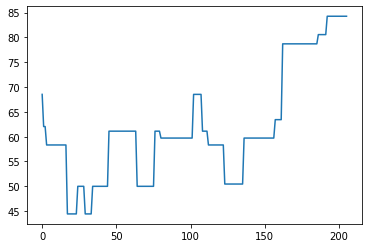

In [79]:
plt.plot(gdata["date_number"],gdata["stringency_index"])
plt.show()

### -- Removing last row

In [80]:
if gdata[:][(len(gdata)-1):].isnull().sum().sum() > 12:
  gdata = gdata[:][:(len(gdata)-1)]

In [81]:
gdata[:][(len(gdata)-1):].isnull().sum().sum()

0

## - Third layer of preporation (Preparing each column)

### -- Taking a look at the dataset

In [82]:
gdata

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,total_tests,...,positive_rate,tests_per_case,stringency_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date_number
id,,,,,,,,,,,,,,,,,,,,,
0,2020-05-29,2909.0,3.0,5.143,175.0,0.0,0.857,0.76,4377.0,174844.0,...,0.0013,746.8,68.52,-16.625,17.250,42.750,-17.000,-12.125,5.375,0
1,2020-05-30,2915.0,6.0,5.571,175.0,0.0,0.571,0.79,3472.0,178316.0,...,0.0015,649.3,62.04,-16.750,18.375,43.250,-16.875,-12.250,6.000,1
2,2020-05-31,2917.0,2.0,5.571,175.0,0.0,0.571,0.82,2202.0,180518.0,...,0.0015,681.0,62.04,-17.875,15.000,55.750,-10.125,2.125,2.625,2
3,2020-06-01,2918.0,1.0,5.143,179.0,4.0,1.000,0.86,1905.0,182423.0,...,0.0013,760.6,58.33,-28.250,36.625,59.000,-15.500,4.625,2.750,3
4,2020-06-02,2937.0,19.0,6.857,179.0,0.0,0.857,0.90,3167.0,185590.0,...,0.0020,512.5,58.33,-13.500,16.250,47.500,-13.250,-8.250,4.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2020-12-16,127557.0,1185.0,1119.571,3870.0,85.0,83.000,0.77,33727.0,3005479.0,...,0.0410,24.4,84.26,-47.500,2.375,0.125,-47.250,-35.000,11.625,201
202,2020-12-17,128710.0,1153.0,1065.286,3948.0,78.0,82.571,0.76,33509.0,3038988.0,...,0.0388,25.7,84.26,-46.375,3.625,10.875,-44.875,-34.125,11.000,202
203,2020-12-18,129584.0,874.0,990.857,4044.0,96.0,81.714,0.76,36084.0,3075072.0,...,0.0355,28.2,84.26,-47.000,3.375,9.750,-43.625,-34.750,11.125,203


* We wont use new_cases and new_tests columns because we have the smoothed version with less missing data and is a better representation of reality so we will remove them
* we wont use deaths to predict the new cases so because cases predict deaths, not the other was around. So we will remove them
* Some of the columns effect the cases but previous values of them, we will create new features and remove the origin columns that we wont use
* We wont use Positive rate	, Tests per case and Tests columns that can give a level of validity at our other columns because we hope are taken into account at the calculation of reproduction_rate and their analysis is beyond the level of this notebook

### -- Creating new features

In [83]:
gdata

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,new_tests,total_tests,...,positive_rate,tests_per_case,stringency_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date_number
id,,,,,,,,,,,,,,,,,,,,,
0,2020-05-29,2909.0,3.0,5.143,175.0,0.0,0.857,0.76,4377.0,174844.0,...,0.0013,746.8,68.52,-16.625,17.250,42.750,-17.000,-12.125,5.375,0
1,2020-05-30,2915.0,6.0,5.571,175.0,0.0,0.571,0.79,3472.0,178316.0,...,0.0015,649.3,62.04,-16.750,18.375,43.250,-16.875,-12.250,6.000,1
2,2020-05-31,2917.0,2.0,5.571,175.0,0.0,0.571,0.82,2202.0,180518.0,...,0.0015,681.0,62.04,-17.875,15.000,55.750,-10.125,2.125,2.625,2
3,2020-06-01,2918.0,1.0,5.143,179.0,4.0,1.000,0.86,1905.0,182423.0,...,0.0013,760.6,58.33,-28.250,36.625,59.000,-15.500,4.625,2.750,3
4,2020-06-02,2937.0,19.0,6.857,179.0,0.0,0.857,0.90,3167.0,185590.0,...,0.0020,512.5,58.33,-13.500,16.250,47.500,-13.250,-8.250,4.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2020-12-16,127557.0,1185.0,1119.571,3870.0,85.0,83.000,0.77,33727.0,3005479.0,...,0.0410,24.4,84.26,-47.500,2.375,0.125,-47.250,-35.000,11.625,201
202,2020-12-17,128710.0,1153.0,1065.286,3948.0,78.0,82.571,0.76,33509.0,3038988.0,...,0.0388,25.7,84.26,-46.375,3.625,10.875,-44.875,-34.125,11.000,202
203,2020-12-18,129584.0,874.0,990.857,4044.0,96.0,81.714,0.76,36084.0,3075072.0,...,0.0355,28.2,84.26,-47.000,3.375,9.750,-43.625,-34.750,11.125,203


We could add a column with acti

#### --- Adding feature and Ploting Functions

In [91]:
def Adding_Feature( column_of_origin_name , days_before , days_for_avg ):
  datadata = countryData[column_of_origin_name][(60-days_before):].copy()
  #if column_of_origin_name == "stringency_index":
    #nan_stringency_index = datadata.index[datadata.apply(np.isnan)]
    #datadata.loc[nan_stringency_index] = datadata[nan_stringency_index[0]-1]

  avgdays = []
  
  for i in range(len(gdata)):
    avgdays.append(sum( datadata[ii] for ii in range( ( i - days_before ) ,( i - (days_before - days_for_avg) ) ) )/days_for_avg)
  print(len(avgdays))
  return avgdays

In [92]:
def Print_One( ycolumn_name_one , xcolumn_name , dataset_name ):
  plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
  plt.plot(dataset_name[xcolumn_name],dataset_name[ycolumn_name_one])
  plt.show()

In [93]:
def Scale_Print_One( ycolumn_name_one , xcolumn_name , dataset_name ):
  test_scale_data = dataset_name[21:].copy()
  test_scale_data["id"] = np.arange(21, len(dataset_name))
  test_scale_data.set_index("id", inplace=True)


  test_scale_data[ycolumn_name_one] = scaler.fit_transform(test_scale_data[[ycolumn_name_one]])

  plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
  plt.plot(test_scale_data[xcolumn_name],test_scale_data[ycolumn_name_one])

  plt.show()

In [94]:
def Scale_Print_Two( ycolumn_name_one , ycolumn_name_two , xcolumn_name , dataset_name ):
  test_scale_data = dataset_name[21:].copy()
  test_scale_data["id"] = np.arange(21, len(dataset_name))
  test_scale_data.set_index("id", inplace=True)


  test_scale_data[ycolumn_name_one] = scaler.fit_transform(test_scale_data[[ycolumn_name_one]])
  test_scale_data[ycolumn_name_two] = scaler.fit_transform(test_scale_data[[ycolumn_name_two]])

  plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
  plt.plot(test_scale_data[xcolumn_name],test_scale_data[ycolumn_name_one])
  plt.plot(test_scale_data[xcolumn_name],test_scale_data[ycolumn_name_two])

  plt.show()

In [95]:
def Scale_Print_Three( ycolumn_name_one , ycolumn_name_two , ycolumn_name_three , xcolumn_name , dataset_name ):
  scaler = MinMaxScaler()
  test_scale_data = dataset_name[21:].copy()
  test_scale_data["id"] = np.arange(21, len(dataset_name))
  test_scale_data.set_index("id", inplace=True)


  test_scale_data[ycolumn_name_one] = scaler.fit_transform(test_scale_data[[ycolumn_name_one]])
  test_scale_data[ycolumn_name_two] = scaler.fit_transform(test_scale_data[[ycolumn_name_two]])
  test_scale_data[ycolumn_name_three] = scaler.fit_transform(test_scale_data[[ycolumn_name_three]])

  plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
  plt.plot(test_scale_data[xcolumn_name],test_scale_data[ycolumn_name_one])
  plt.plot(test_scale_data[xcolumn_name],test_scale_data[ycolumn_name_two])
  plt.plot(test_scale_data[xcolumn_name],test_scale_data[ycolumn_name_three])

  plt.show()

In [96]:
def Scale_Print_Four( ycolumn_name_one , ycolumn_name_two , ycolumn_name_three , ycolumn_name_four , xcolumn_name , dataset_name ):
  scaler = MinMaxScaler()
  test_scale_data = dataset_name[21:].copy()
  test_scale_data["id"] = np.arange(21, len(dataset_name))
  test_scale_data.set_index("id", inplace=True)


  test_scale_data[ycolumn_name_one] = scaler.fit_transform(test_scale_data[[ycolumn_name_one]])
  test_scale_data[ycolumn_name_two] = scaler.fit_transform(test_scale_data[[ycolumn_name_two]])
  test_scale_data[ycolumn_name_three] = scaler.fit_transform(test_scale_data[[ycolumn_name_three]])
  test_scale_data[ycolumn_name_four] = scaler.fit_transform(test_scale_data[[ycolumn_name_four]])

  plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
  plt.plot(test_scale_data[xcolumn_name],test_scale_data[ycolumn_name_one])
  plt.plot(test_scale_data[xcolumn_name],test_scale_data[ycolumn_name_two])
  plt.plot(test_scale_data[xcolumn_name],test_scale_data[ycolumn_name_three])
  plt.plot(test_scale_data[xcolumn_name],test_scale_data[ycolumn_name_four])

  plt.show()

#### --- Active cases

We assume that:
* That that the testing has been stockastic so we can assume that cases are representative at the same level each  day
* Fatality rate is about 1.4% (taken from Worldometer with data provided by New York City
* Days taken to double the cases: 33 (taken from statista for Greece)
* Days required to die: 18


In [97]:
days_required_to_die = 18
fatality_rate = 0.014
time_taken_to_double_cases = 33


active_cases = []


active_cases = gdata["new_deaths"] *days_required_to_die / (fatality_rate * 2 * time_taken_to_double_cases)

gdata["active_cases"] = gdata["new_deaths"] *days_required_to_die / (fatality_rate * 2 * time_taken_to_double_cases)


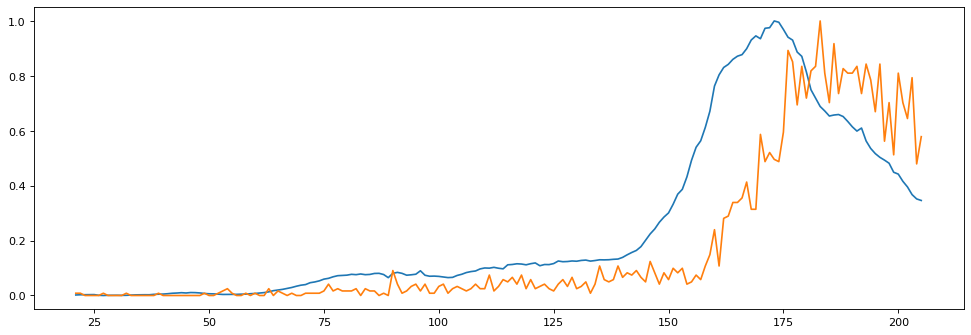

In [98]:
Scale_Print_Two( "new_cases_smoothed" , "active_cases" , "date_number" , gdata )

In [99]:
gdata["active_cases_over_reproduction_rate"] = pow( gdata["active_cases"] , gdata["reproduction_rate"] )

datadata = gdata["active_cases_over_reproduction_rate"].copy()

avgdays = []
for i in range(10):
  avgdays.append(0)

for i in range(10,len(gdata)):
   avgdays.append(sum( datadata[ii] for ii in range( ( i - 10 ) ,( i - (10 - 3) ) ) )/3)
print(len(avgdays))
 
gdata["active_cases_over_reproduction_rate_3avg10days"] = avgdays

206


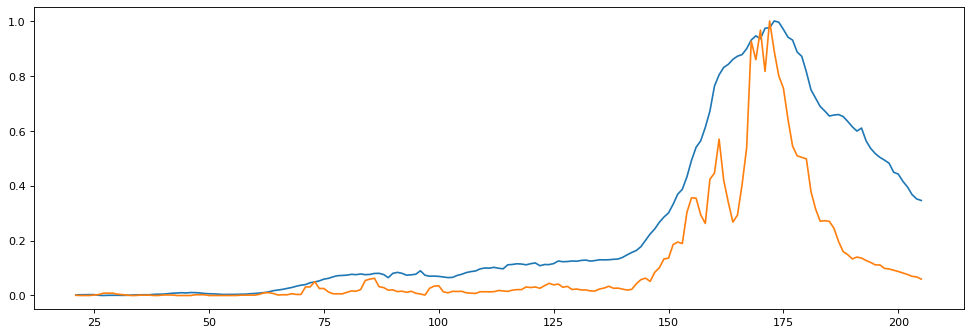

In [100]:
Scale_Print_Two( "new_cases_smoothed" , "active_cases_over_reproduction_rate_3avg10days" , "date_number" , gdata )

In [101]:
np.corrcoef( gdata["active_cases_over_reproduction_rate_3avg10days"][100:190] , gdata["new_cases_smoothed"][100:190])[0][1]*100

90.79557053386623

We can see that:
* Active cases ist a predictor for new cases but the other way around
* W have a great correlation between active_cases_over_reproduction_rate_3avg10days with new_cases_smoothed but we dont have data from the last days for reproduction_rate so we can use them for predictions

#### --- Investigating the latency for Reproduction rate




In [102]:
testing_gdata = gdata.copy()

In [103]:
testing_gdata["reproduction_rate_3avg21days"] = Adding_Feature("reproduction_rate" , 21 , 3 )

206


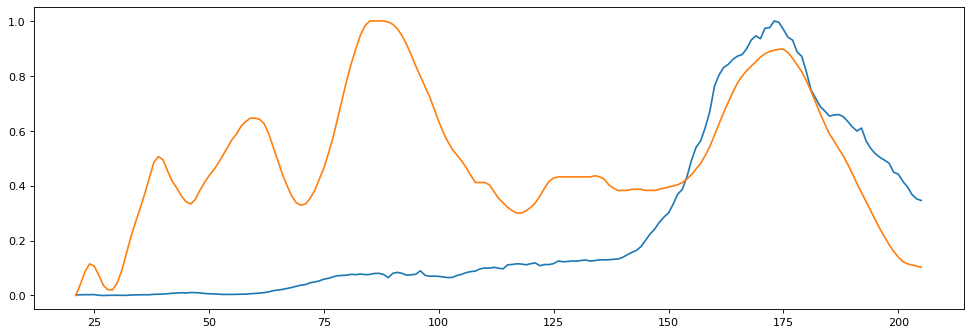

In [104]:
Scale_Print_Two( "new_cases_smoothed" , "reproduction_rate_3avg21days" , "date_number" , testing_gdata )

In [105]:
abs( np.corrcoef( testing_gdata["reproduction_rate_3avg21days"][100:] , testing_gdata["new_cases_smoothed"][100:]) )[0][1]*100

69.29269612254735

#### --- Investigating the latency for Stringency index






In [106]:
testing_gdata["stringency_index_7avg14days"] = Adding_Feature("stringency_index" , 14 , 7 )

206


In [107]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

testing_gdata["stringency_index_7avg14days"] = smooth(testing_gdata["stringency_index_7avg14days"],10)

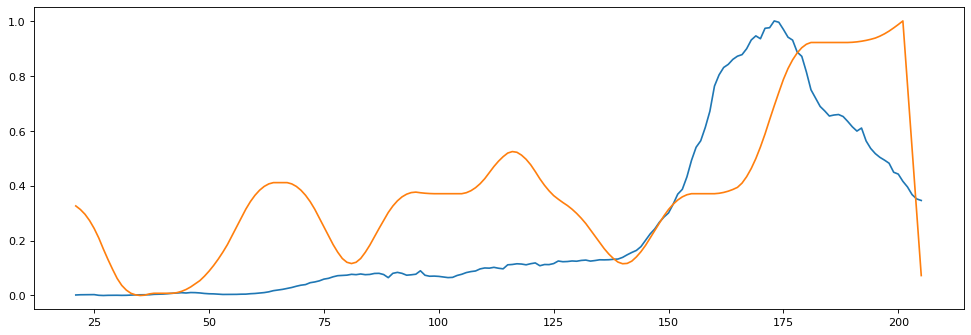

In [108]:
Scale_Print_Two( "new_cases_smoothed" , "stringency_index_7avg14days" , "date_number" , testing_gdata )

In [109]:
np.corrcoef( testing_gdata["stringency_index_7avg14days"][100:200] , testing_gdata["new_cases_smoothed"][100:200])[0][1]*100

56.948335828284115

#### --- Investigating

We assume that one weeks Stringency index and Reproduction rate measurments take effect at the number of cases after about 2 weeks

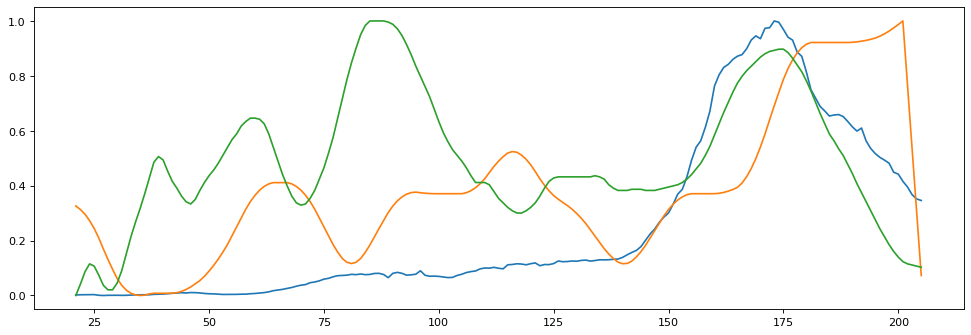

In [110]:
Scale_Print_Three( "new_cases_smoothed" , "stringency_index_7avg14days" , "reproduction_rate_3avg21days" , "date_number" , testing_gdata )

In [111]:
testing_gdata["stringency_index_7avg14days"] = scaler.fit_transform(testing_gdata[["stringency_index_7avg14days"]])
testing_gdata["reproduction_rate_3avg21days"] = scaler.fit_transform(testing_gdata[["reproduction_rate_3avg21days"]])
testing_gdata["stringency_index_reproduction_rate_14avg28days"] = scaler.fit_transform(testing_gdata[["reproduction_rate_3avg21days"]]) + scaler.fit_transform(testing_gdata[["stringency_index_7avg14days"]])

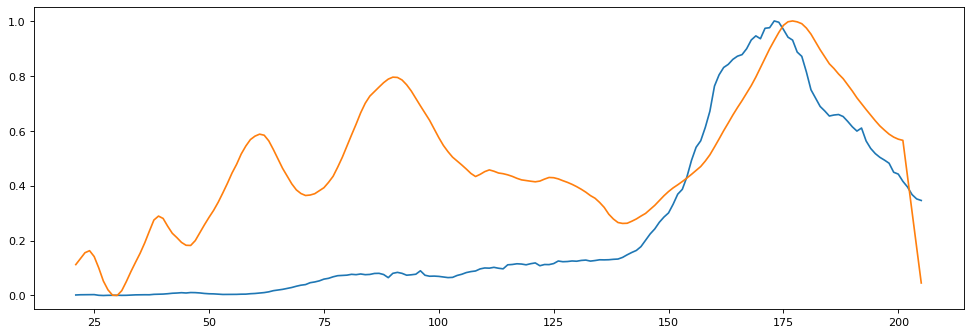

In [112]:
Scale_Print_Two( "new_cases_smoothed" , "stringency_index_reproduction_rate_14avg28days" , "date_number" , testing_gdata )

In [113]:
np.corrcoef( testing_gdata["stringency_index_reproduction_rate_14avg28days"][100:200] , testing_gdata["new_cases_smoothed"][100:200])[0][1]*100

84.56865757369974

In [114]:
gdata["stringency_index_7avg14days"] = testing_gdata["stringency_index_7avg14days"]
gdata["reproduction_rate_3avg21days"] = testing_gdata["reproduction_rate_3avg21days"]

#### --- Investigating mobility

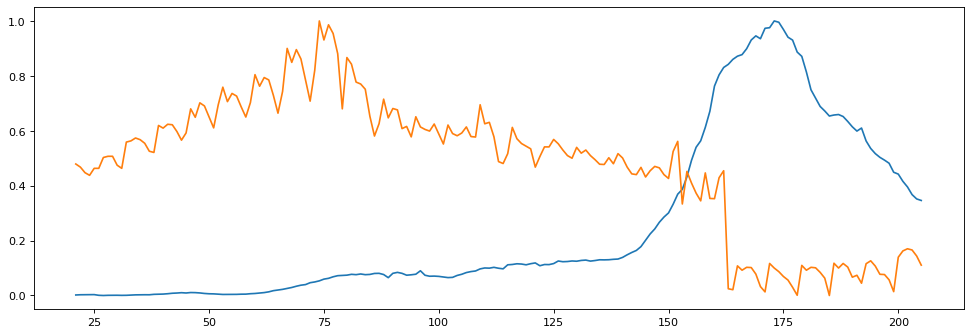

In [115]:
Scale_Print_Two( "new_cases_smoothed" , "retail_and_recreation_percent_change_from_baseline" , "date_number" , gdata )

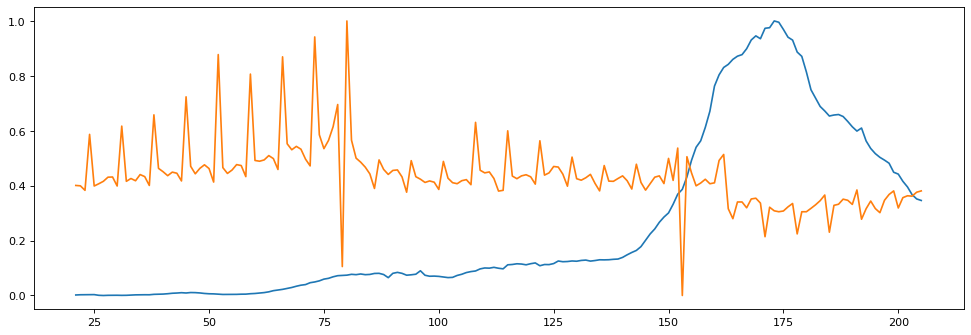

In [116]:
Scale_Print_Two( "new_cases_smoothed" , "grocery_and_pharmacy_percent_change_from_baseline" , "date_number" , gdata )

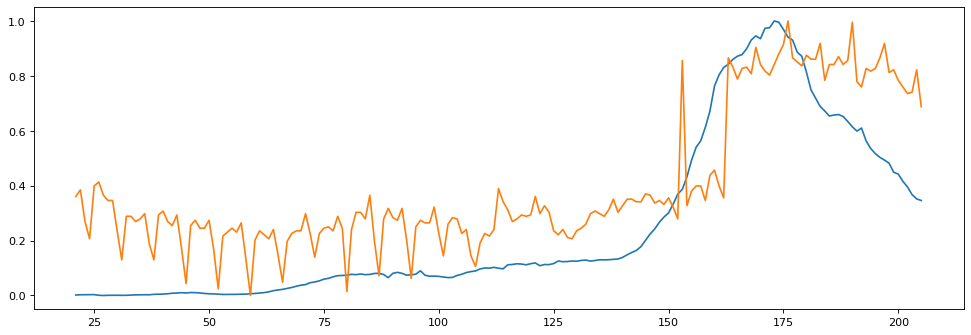

In [117]:
Scale_Print_Two( "new_cases_smoothed" , "residential_percent_change_from_baseline" , "date_number" , gdata )

In [118]:
gdata["mobility"] = gdata["retail_and_recreation_percent_change_from_baseline"] + gdata["grocery_and_pharmacy_percent_change_from_baseline"] + gdata["residential_percent_change_from_baseline"]
gdata["mobility"] = gdata["mobility"] +gdata["parks_percent_change_from_baseline"] + gdata["transit_stations_percent_change_from_baseline"] + gdata["workplaces_percent_change_from_baseline"]

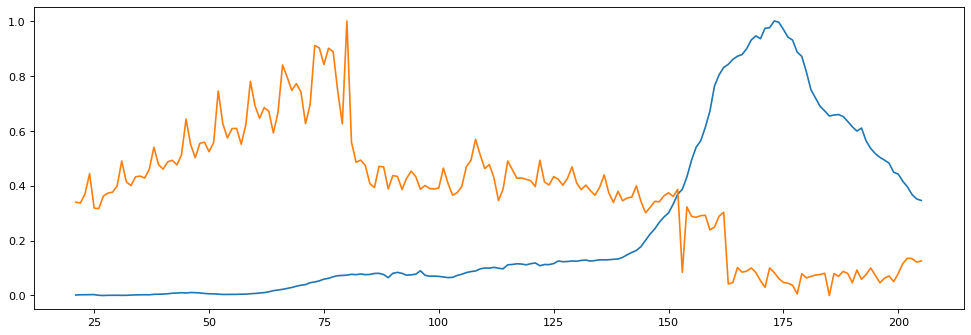

In [119]:
Scale_Print_Two( "new_cases_smoothed" , "mobility" , "date_number" , gdata )

In [120]:
np.corrcoef( gdata["mobility"][100:200] , gdata["new_cases_smoothed"][100:200])[0][1]*100

-87.55480322978222

In [121]:
datadata = gdata["mobility"].copy()

avgdays = []
for i in range(21):
  avgdays.append(0)

for i in range(21,len(testing_gdata)):
   avgdays.append(sum( datadata[ii] for ii in range( ( i - 21 ) ,( i - (21 - 3) ) ) )/3)
print(len(avgdays))
 
testing_gdata["mobility_3avg21days"] = avgdays

206


In [122]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

testing_gdata["mobility_3avg21days"] = smooth(testing_gdata["mobility_3avg21days"],10)

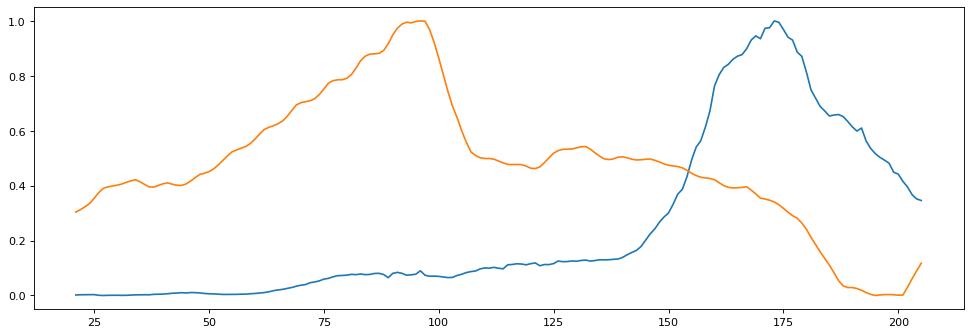

In [123]:
Scale_Print_Two( "new_cases_smoothed" , "mobility_3avg21days" , "date_number" , testing_gdata )

We conclude that mobility isnt a predictor for new cases as probably is motivated by the scarcity by the Goverment or in general by the number of deaths or cases each day

#### --- Investigating Total cases

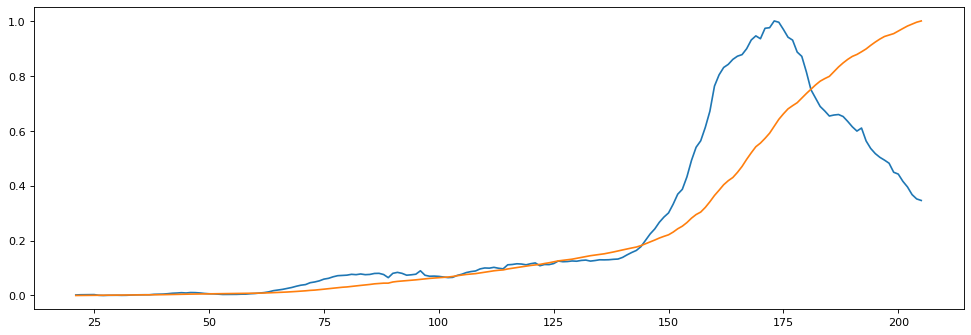

In [124]:
Scale_Print_Two( "new_cases_smoothed" , "total_cases" , "date_number" , testing_gdata )

In [125]:
testing_gdata["total_cases_3avg21days"] = Adding_Feature("total_cases" , 21 , 3 )

206


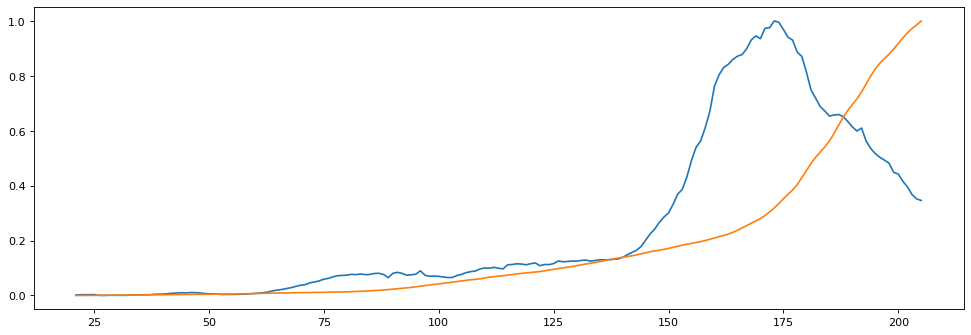

In [126]:
Scale_Print_Two( "new_cases_smoothed" , "total_cases_3avg21days" , "date_number" , testing_gdata )

### -- Dropping columns we wont use

In [127]:
columns_we_wont_use = [ "new_cases" , "total_deaths" ,	"new_deaths" ,	"new_deaths_smoothed" , "new_tests" ,	"total_tests" ,	"new_tests_smoothed" ,	"positive_rate" ,	"tests_per_case" ,
                       "retail_and_recreation_percent_change_from_baseline" , "grocery_and_pharmacy_percent_change_from_baseline" , "parks_percent_change_from_baseline"	,
                       "transit_stations_percent_change_from_baseline" , "workplaces_percent_change_from_baseline" , "residential_percent_change_from_baseline" ,"mobility" , "total_cases" , 
                       "active_cases" , "active_cases_over_reproduction_rate" , "active_cases_over_reproduction_rate_3avg10days"]
for columns_we_wont_use in columns_we_wont_use:
    gdata = gdata.drop(columns_we_wont_use,axis=1)

In [128]:
gdata_for_use = gdata.copy()

columns_we_wont_use = [ "reproduction_rate" , "stringency_index" , "date" , "date_number"]
for columns_we_wont_use in columns_we_wont_use:
    gdata_for_use = gdata_for_use.drop(columns_we_wont_use,axis=1)

## - Forth layer of preporation ( Making of the data we will use for our prediction ,scaling and spliting )

In [129]:
gdata_for_use = pd.DataFrame(data=gdata_for_use)

In [130]:
gdata_for_use

,new_cases_smoothed,stringency_index_7avg14days,reproduction_rate_3avg21days
id,,,
0,5.143,0.000000,0.068702
1,5.571,0.145341,0.087786
2,5.571,0.290682,0.106870
3,5.143,0.436023,0.125954
4,6.857,0.581364,0.145038
...,...,...,...
201,1119.571,1.000000,0.187023
202,1065.286,0.831375,0.179389
203,990.857,0.662186,0.175573


### -- Adding 7 rows

In [131]:
len(gdata_for_use)

206

In [132]:
for i in range(7):
  gdata_for_use = gdata_for_use.append(pd.Series(), ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [133]:
len(gdata_for_use)

213

### -- Filling the values of the columns we know their development

stringency_index_7avg14days

In [134]:
avgdays = []
  
for i in range( (len(gdata_for_use)-7),len(gdata_for_use)):
  avgdays.append(sum( gdata_for_use["stringency_index_7avg14days"][ii] for ii in range( ( i - 14 ) ,( i - (14 - 7) ) ) )/7)
gdata_for_use["stringency_index_7avg14days"][(len(gdata_for_use)-7):] = avgdays
gdata_for_use["stringency_index_7avg14days"][200:]

200    0.990455
201    1.000000
202    0.831375
203    0.662186
204    0.492434
205    0.322118
206    0.956881
207    0.961945
208    0.967971
209    0.974957
210    0.957372
211    0.914893
212    0.847279
Name: stringency_index_7avg14days, dtype: float64

reproduction_rate_3avg21days

In [135]:
avgdays = []
  
for i in range( (len(gdata_for_use)-7),len(gdata_for_use)):
  avgdays.append(sum( gdata_for_use["reproduction_rate_3avg21days"][ii] for ii in range( ( i - 21 ) ,( i - (21 - 3) ) ) )/3)
gdata_for_use["reproduction_rate_3avg21days"][(len(gdata_for_use)-7):] = avgdays
gdata_for_use["reproduction_rate_3avg21days"][200:]

200    0.202290
201    0.187023
202    0.179389
203    0.175573
204    0.171756
205    0.167939
206    0.594148
207    0.569975
208    0.543257
209    0.515267
210    0.483461
211    0.451654
212    0.419847
Name: reproduction_rate_3avg21days, dtype: float64

#  Scaling and splitting


In [136]:
gdata_for_use

,new_cases_smoothed,stringency_index_7avg14days,reproduction_rate_3avg21days
0,5.143,0.000000,0.068702
1,5.571,0.145341,0.087786
2,5.571,0.290682,0.106870
3,5.143,0.436023,0.125954
4,6.857,0.581364,0.145038
...,...,...,...
208,NaN,0.967971,0.543257
209,NaN,0.974957,0.515267
210,NaN,0.957372,0.483461
211,NaN,0.914893,0.451654


In [137]:
gdata_for_use["stringency_index_7avg14days"] = scaler.fit_transform(gdata_for_use[["stringency_index_7avg14days"]])
gdata_for_use["reproduction_rate_3avg21days"] = scaler.fit_transform(gdata_for_use[["reproduction_rate_3avg21days"]])

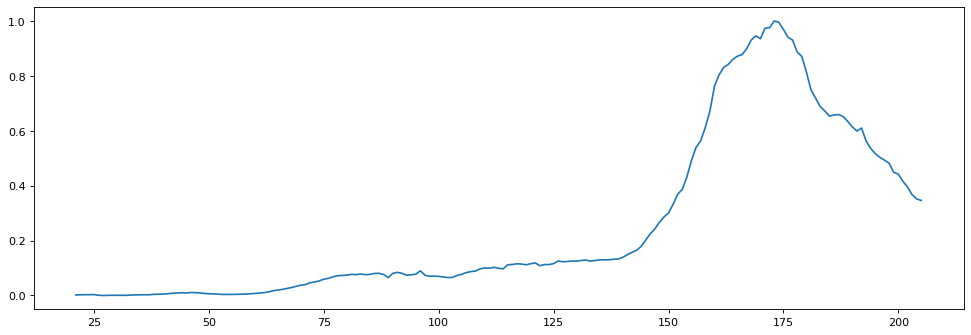

In [138]:
Scale_Print_One( "new_cases_smoothed" , "date_number" , gdata)

With less that 500 we can realy say that we have the needed features to predict the next few days but we cant realy make a proper model with 50 row of data so we will meet at the middle and use after the 100 days of the second wave

In [139]:
gdata_for_training = gdata_for_use[:][100:(len(gdata_for_use)-7)]
gdata_fot_prediction = gdata_for_use[:][(len(gdata_for_use)-7):]

In [140]:
X_pred = gdata_fot_prediction.drop("new_cases_smoothed",axis=1)

We will create a split with test data only the last 7 days because 7 days are the size of  the prediction we will make

In [141]:
gdata_train = gdata_for_training[:][:(len(gdata_for_training)-7)]
gdata_test = gdata_for_training[:][(len(gdata_for_training)-7):]

In [142]:
X = gdata_for_training.drop("new_cases_smoothed",axis=1)
y = gdata_for_training["new_cases_smoothed"]

In [143]:
X_train = gdata_train.drop("new_cases_smoothed",axis=1)
y_train =  gdata_train["new_cases_smoothed"]
X_test = gdata_test.drop("new_cases_smoothed",axis=1)
y_test = gdata_test["new_cases_smoothed"]

#  Regressions

## - Linear regression

In [144]:
np.unique(X_test, return_counts = True)

(array([0.16793893, 0.17175573, 0.17557252, 0.17938931, 0.1870229 ,
        0.20229008, 0.22137405, 0.32211751, 0.49243356, 0.66218599,
        0.83137481, 0.98146723, 0.99045483, 1.        ]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

### -- Ridge

In [145]:
train_errors = []
test_errors = []
alpha = []
for i in range(1000):
  alpha.append(i/10)

  ridge_reg = Ridge(alpha=i/10, solver="sag", random_state=42)
  ridge_reg.fit(X_train, y_train)
  y_train_predict = ridge_reg.predict(X_train)
  y_test_predict = ridge_reg.predict(X_test)

  train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
  test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))

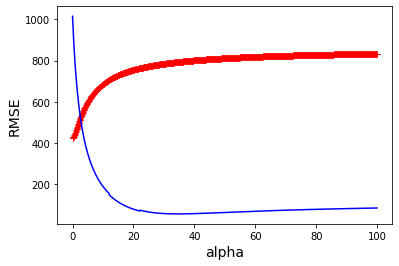

In [146]:
plt.plot(alpha,train_errors, "r-+")
plt.plot(alpha,test_errors, "b-")
plt.xlabel("alpha", fontsize=14) # not shown
plt.ylabel("RMSE", fontsize=14)              # not shown
plt.show()

In [147]:
min = abs(train_errors[0]-test_errors[0])
index_value = 0
for i in range(len(train_errors)):
  value = abs(train_errors[i]-test_errors[i])
  if value < min:
    min = value
    index_value = i

print(min,alpha[index_value])

0.04435941046369862 2.6


In [148]:
ridge_reg = Ridge(alpha=2.5, solver="sag", random_state=42)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=2.5, random_state=42, solver='sag')

In [149]:
y_train_predict = ridge_reg.predict(X_train)
y_test_predict = ridge_reg.predict(X_test)

train_error = np.sqrt( mean_squared_error(y_train, y_train_predict) )
test_error = np.sqrt( mean_squared_error(y_test, y_test_predict) )

In [150]:
y_predict = y.copy()
y_predict[:(len(y)-len(y_test_predict))] = y_train_predict
y_predict[(len(y)-len(y_test_predict)):] = y_test_predict

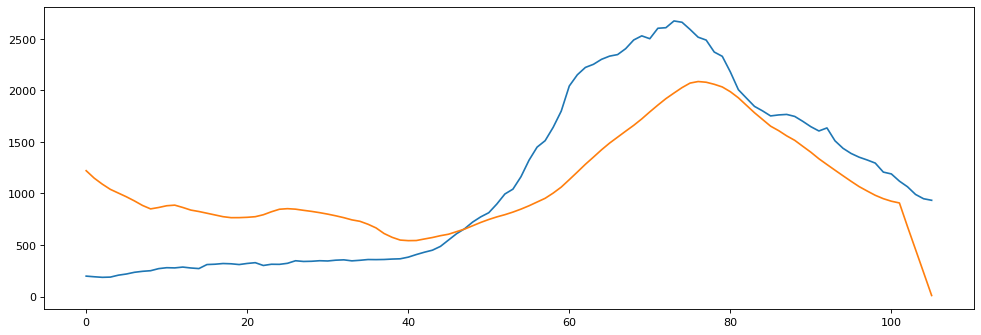

In [151]:
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
x = np.arange(len(X))
plt.plot(x,y)
plt.plot(x,y_predict)
plt.show()

In [152]:
for i in range(len(y_test_predict)):
  print(gdata["date"][len(gdata)-len(y_test_predict)+i] , y_test_predict[i])


2020-12-14 949.6616480437469
2020-12-15 924.9006864433081
2020-12-16 908.0840965228799
2020-12-17 679.3702437746274
2020-12-18 457.1762820538238
2020-12-19 234.26623005902945
2020-12-20 10.640087790244252


In [153]:
y_prediction = ridge_reg.predict(X_pred)

In [154]:
print(gdata["date"][len(gdata)-1])
model_and_prediction = []

model_and_prediction.append(["Ridge",0,round(test_errors[index_value],-2)])

for i in range(len(y_prediction)):
  model_and_prediction.append(["days after", i+1 , round(y_prediction[i],-2)])
  print("days after", i+1 , round(y_prediction[i]))
print("With RMSE: ", round(test_errors[index_value]))

2020-12-20
days after 1 1625
days after 2 1586
days after 3 1543
days after 4 1499
days after 5 1416
days after 6 1302
days after 7 1155
With RMSE:  521


### -- Lasso

In [155]:
train_errors = []
test_errors = []
alpha = []
for i in range(1000):
  alpha.append(i/10)

  lasso_reg = Lasso(alpha=i/10)
  lasso_reg.fit(X_train, y_train)
  y_train_predict = lasso_reg.predict(X_train)
  y_test_predict = lasso_reg.predict(X_test)

  train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
  test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.875e+06, tolerance: 7.280e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

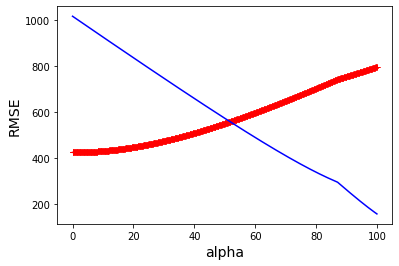

In [156]:
plt.plot(alpha,train_errors, "r-+")
plt.plot(alpha,test_errors, "b-")
plt.xlabel("alpha", fontsize=14)
plt.ylabel("RMSE", fontsize=14)          
plt.show()

In [157]:
min = abs(train_errors[0]-test_errors[0])
index_value = 0
for i in range(len(train_errors)):
  value = abs(train_errors[i]-test_errors[i])
  if value < min:
    min = value
    index_value = i

print(min,alpha[index_value])

0.11475542674111239 51.7


In [158]:
lasso_reg = Lasso(alpha=alpha[index_value])
lasso_reg.fit(X_train, y_train)

Lasso(alpha=51.7)

In [159]:
y_train_predict = lasso_reg.predict(X_train)
y_test_predict = lasso_reg.predict(X_test)

train_error = np.sqrt( mean_squared_error(y_train, y_train_predict) )
test_error = np.sqrt( mean_squared_error(y_test, y_test_predict) )

In [160]:
y_predict = y.copy()
y_predict[:(len(y)-len(y_test_predict))] = y_train_predict
y_predict[(len(y)-len(y_test_predict)):] = y_test_predict

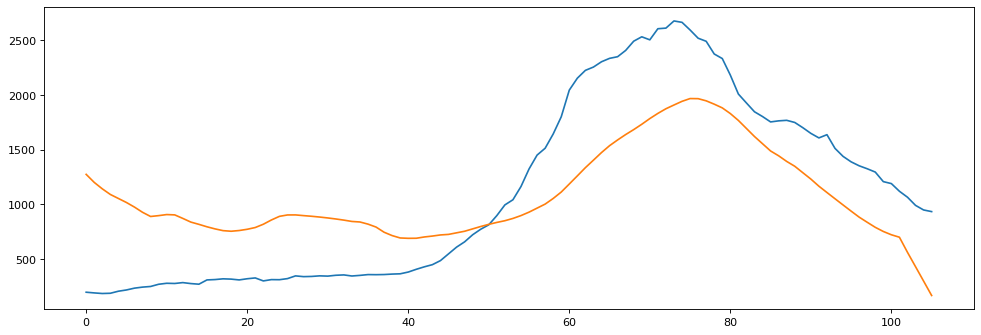

In [161]:
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
x = np.arange(len(X))
plt.plot(x,y)
plt.plot(x,y_predict)
plt.show()

In [162]:
for i in range(len(y_test_predict)):
  print(gdata["date"][len(gdata)-len(y_test_predict)+i] , y_test_predict[i])

2020-12-14 752.7908274582917
2020-12-15 722.6886988442322
2020-12-16 700.326624262457
2020-12-17 562.5343019060374
2020-12-18 431.66337368161305
2020-12-19 300.3809029127191
2020-12-20 168.6868895993556


In [163]:
y_prediction = lasso_reg.predict(X_pred)

In [164]:
print(gdata["date"][len(gdata)-1])
model_and_prediction.append(["Lasso",0,round(test_errors[index_value],-2)])

for i in range(len(y_prediction)):
  model_and_prediction.append(["days after", i+1 , round(y_prediction[i],-2)])
  print("days after", i+1 , y_prediction[i])
print("With RMSE: ", round(test_errors[index_value]))

2020-12-20
days after 1 1451.0219513422371
days after 2 1408.2775802601163
days after 3 1361.3469253827884
days after 4 1312.6736667659347
days after 5 1238.7252280054295
days after 6 1146.600010779276
days after 7 1036.1222718810805
With RMSE:  557


## - Polynomial

In [165]:
train_errors = []
test_errors = []
degree = []
lin_reg = LinearRegression()

for i in range(1,7):
  degree.append(i)

  poly_features = PolynomialFeatures(degree=i, include_bias=False)
  X_poly = poly_features.fit_transform(X_train)
  lin_reg.fit(X_poly, y_train)
              
  X_test_transformed = poly_features.transform(X_test)
  y_test_predict = lin_reg.predict(X_test_transformed)

  X_train_transformed = poly_features.transform(X_train)
  y_train_predict = lin_reg.predict(X_train_transformed)


  train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
  test_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))

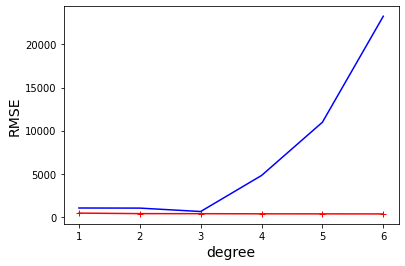

In [166]:
plt.plot(degree,train_errors, "r-+")
plt.plot(degree,test_errors, "b-")
plt.xlabel("degree", fontsize=14) # not shown
plt.ylabel("RMSE", fontsize=14)              # not shown
plt.show()

In [167]:
min = abs(train_errors[0]-test_errors[0])
index_value = 0
for i in range(len(train_errors)):
  value = abs(train_errors[i]-test_errors[i])
  if value < min:
    min = value
    index_value = i

print(min,degree[index_value])

253.02566790512174 3


In [168]:
poly_features = PolynomialFeatures(degree=degree[index_value], include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

X_test_transformed = poly_features.transform(X_test)
y_test_predict = lin_reg.predict(X_test_transformed)

X_train_transformed = poly_features.transform(X_train)
y_train_predict = lin_reg.predict(X_train_transformed)


In [169]:
y_predict = y.copy()
y_predict[:(len(y)-len(y_test_predict))] = y_train_predict
y_predict[(len(y)-len(y_test_predict)):] = y_test_predict

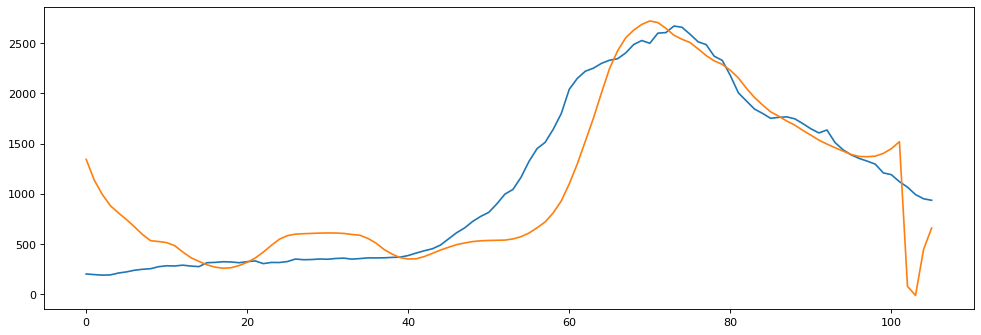

In [170]:
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
x = np.arange(len(X))
plt.plot(x,y)
plt.plot(x,y_predict)
plt.show()

In [171]:
for i in range(len(y_test_predict)):
  print(gdata["date"][len(gdata)-len(y_test_predict)+i] , y_test_predict[i])

2020-12-14 1402.2550668347164
2020-12-15 1449.0627357812853
2020-12-16 1518.6534881110188
2020-12-17 76.1457682754475
2020-12-18 -16.384315605184838
2020-12-19 443.2832497490051
2020-12-20 657.0571353582643


In [172]:
X_test_transformed = poly_features.transform(X_pred)
y_prediction = lin_reg.predict(X_test_transformed)

In [173]:
print(gdata["date"][len(gdata)-1])
model_and_prediction.append(["Polynomial",0,round(test_errors[index_value],-2)])
for i in range(len(y_prediction)):
  model_and_prediction.append(["days after", i+1 , round(y_prediction[i],-2)])
  print("days after", i+1 , y_prediction[i])
print("With RMSE: ", round(test_errors[index_value]))

2020-12-20
days after 1 1904.9728339520886
days after 2 1916.1071732495272
days after 3 1938.4702056157705
days after 4 1975.1392325714562
days after 5 1728.0754268520834
days after 6 1263.8189878752494
days after 7 742.5737716727403
With RMSE:  608


## - Random forest regressor

In [174]:
regr = RandomForestRegressor(max_depth=3, random_state=42)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [175]:
y_train_predict = regr.predict(X_train)
y_test_predict = regr.predict(X_test)

train_error = np.sqrt( mean_squared_error(y_train, y_train_predict) )
test_error = np.sqrt( mean_squared_error(y_test, y_test_predict) )

In [176]:
y_predict = y.copy()
y_predict[:(len(y)-len(y_test_predict))] = y_train_predict
y_predict[(len(y)-len(y_test_predict)):] = y_test_predict

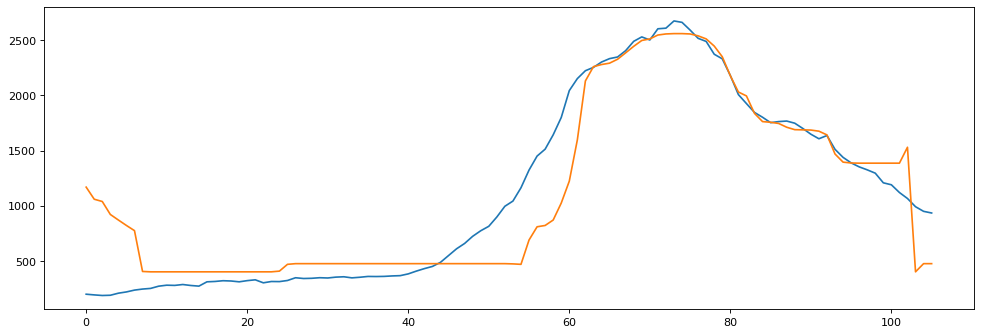

In [177]:
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
x = np.arange(len(X))
plt.plot(x,y)
plt.plot(x,y_predict)
plt.show()

In [178]:
for i in range(len(y_test_predict)):
  print(gdata["date"][len(gdata)-len(y_test_predict)+i] , y_test_predict[i])


2020-12-14 1385.2646514343433
2020-12-15 1385.2646514343433
2020-12-16 1385.2646514343433
2020-12-17 1529.377737879953
2020-12-18 401.18453839125215
2020-12-19 475.22008975234365
2020-12-20 475.22008975234365


In [179]:
y_prediction = regr.predict(X_pred)

In [180]:
print(gdata["date"][len(gdata)-1])
model_and_prediction.append(["Random forest regressor",0,round(test_errors[index_value],-2)])
for i in range(len(y_prediction)):
  model_and_prediction.append(["days after", i+1 , round(y_prediction[i],-2)])
  print("days after", i+1 , y_prediction[i])
print("With RMSE: ", round(test_errors[index_value]))

2020-12-20
days after 1 1652.7009722035746
days after 2 1590.8233214974746
days after 3 1552.9798020233377
days after 4 1551.1776561900044
days after 5 1547.3694648566711
days after 6 1678.8096817934565
days after 7 1661.6745188291707
With RMSE:  608


# Lets try to overfit at our last 7 days as a way to catch the behaviour of the last few days

## - Scaling and splitting


In [181]:
gdata_for_training = gdata_for_use[:][100:(len(gdata_for_use)-14)]
gdata_fot_prediction = gdata_for_use[:][(len(gdata_for_use)-14):]

In [182]:
X_train = gdata_for_training.drop("new_cases_smoothed",axis=1)
y_train =  gdata_for_training["new_cases_smoothed"]

In [183]:
X_test = gdata_fot_prediction.drop("new_cases_smoothed",axis=1)
y_test = gdata_fot_prediction["new_cases_smoothed"]

## - Ridge

In [184]:
reality_check = []
alpha = []
for i in range(1000):
  alpha.append(i/10)

  ridge_reg = Ridge(alpha=i/10, solver="sag", random_state=42)
  ridge_reg.fit(X_train, y_train)
  y_test_predict = ridge_reg.predict(X_test)
  
  reality_check.append(np.sqrt(mean_squared_error(y_test[:7], y_test_predict[:7])))

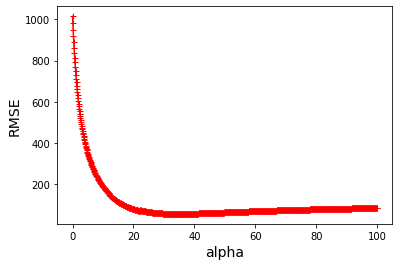

In [185]:
plt.plot(alpha,reality_check, "r-+")
plt.xlabel("alpha", fontsize=14) # not shown
plt.ylabel("RMSE", fontsize=14)              # not shown
plt.show()

In [186]:
min = abs(reality_check[0])
index_value = 0
for i in range(len(reality_check)):
  value = abs(reality_check[i])
  if value < min:
    min = value
    index_value = i

print(min,alpha[index_value])

54.83268050120678 34.6


In [187]:
ridge_reg = Ridge(alpha=alpha[index_value], solver="sag", random_state=42)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=34.6, random_state=42, solver='sag')

In [188]:
y_train_predict = ridge_reg.predict(X_train)
y_test_predict = ridge_reg.predict(X_test)

In [189]:
y_predict = gdata_for_use['new_cases_smoothed'][107:].copy()
y_predict[:(len(y_predict)-7)] = y_train_predict
y_predict[(len(y_predict)-7):] = y_test_predict[:7]

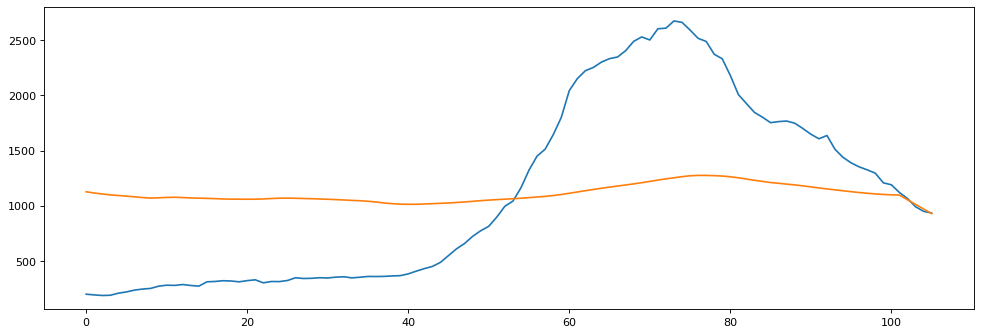

In [190]:
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
x = np.arange(len(y_predict))
plt.plot(x,gdata_for_use["new_cases_smoothed"][100:(len(gdata_for_use)-7)])
plt.plot(x,y_predict)
plt.show()

In [191]:
for i in range(len(y_test_predict)-7):
  print(gdata["date"][len(gdata)-len(y_test_predict)+i+7] , y_test_predict[i])

2020-12-14 1101.9595725989675
2020-12-15 1098.4664707063273
2020-12-16 1096.2345313931532
2020-12-17 1053.700197912231
2020-12-18 1012.1592187061595
2020-12-19 970.4836115415518
2020-12-20 928.6733764184077


In [192]:
print(gdata["date"][len(gdata)-1])

model_and_prediction.append(["Ridge overfitting",0,round(min,-1)])

for i in range(len(y_test_predict)-7):
  model_and_prediction.append(["days after", i+1 , round(y_test_predict[i],-1)])
  print(i+1 ,"days after",  round(y_test_predict[7+i]))
print("With RMSE: ", round(min))

2020-12-20
1 days after 1206
2 days after 1200
3 days after 1194
4 days after 1187
5 days after 1174
6 days after 1154
7 days after 1129
With RMSE:  55


## - Polynomial

In [193]:
reality_check = []
degree = []
lin_reg = LinearRegression()

for i in range(1,7):
  degree.append(i)

  poly_features = PolynomialFeatures(degree=i, include_bias=False)
  X_poly = poly_features.fit_transform(X_train)
  lin_reg.fit(X_poly, y_train)
              
  X_test_transformed = poly_features.transform(X_test)
  y_test_predict = lin_reg.predict(X_test_transformed)

  X_train_transformed = poly_features.transform(X_train)
  y_train_predict = lin_reg.predict(X_train_transformed)

  reality_check.append(np.sqrt(mean_squared_error(y_test[:7], y_test_predict[:7])))

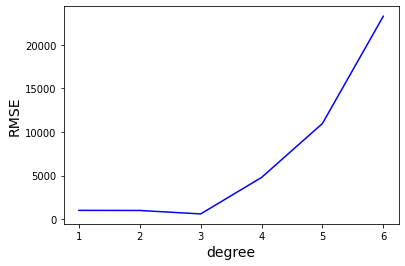

In [194]:
plt.plot(degree,reality_check, "b-")
plt.xlabel("degree", fontsize=14) # not shown
plt.ylabel("RMSE", fontsize=14)              # not shown
plt.show()

In [195]:
min = abs(reality_check[0])
index_value = 0
for i in range(len(reality_check)):
  value = abs(reality_check[i])
  if value < min:
    min = value
    index_value = i

print(min,degree[index_value])

608.2692351738089 3


In [196]:
poly_features = PolynomialFeatures(degree=degree[index_value], include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

X_test_transformed = poly_features.transform(X_test)
y_test_predict = lin_reg.predict(X_test_transformed)

X_train_transformed = poly_features.transform(X_train)
y_train_predict = lin_reg.predict(X_train_transformed)


In [197]:
y_predict = gdata_for_use['new_cases_smoothed'][107:].copy()
y_predict[:(len(y_predict)-7)] = y_train_predict
y_predict[(len(y_predict)-7):] = y_test_predict[:7]

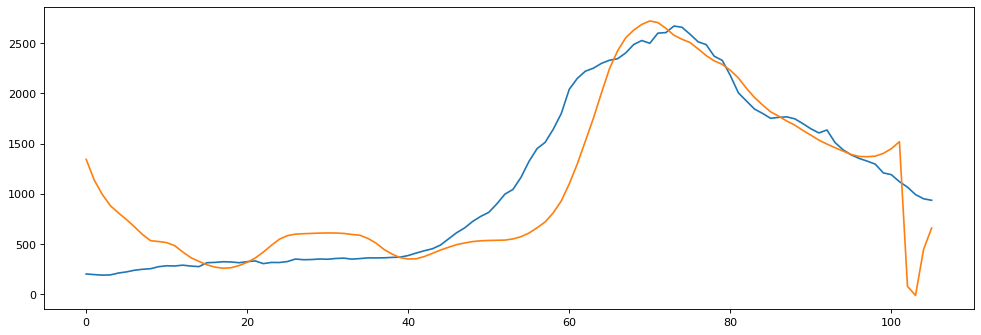

In [198]:
plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
x = np.arange(len(y_predict))
plt.plot(x,gdata_for_use["new_cases_smoothed"][100:(len(gdata_for_use)-7)])
plt.plot(x,y_predict)
plt.show()

In [199]:
for i in range(len(y_test_predict)-7):
  print(gdata["date"][len(gdata)-len(y_test_predict)+i+7] , y_test_predict[i])

2020-12-14 1402.2550668347164
2020-12-15 1449.0627357812853
2020-12-16 1518.6534881110188
2020-12-17 76.1457682754475
2020-12-18 -16.384315605184838
2020-12-19 443.283249749006
2020-12-20 657.0571353582643


In [200]:
print(gdata["date"][len(gdata)-1])
model_and_prediction.append(["Polynomial overfitting",0,round(min,-2)])

for i in range(len(y_test_predict)-7):
  model_and_prediction.append(["days after", i+1 , round(y_test_predict[7+i],-2)])
  print(i+1 ,"days after",  round(y_test_predict[7+i]))
print("With RMSE: ", round(min))

2020-12-20
1 days after 1905
2 days after 1916
3 days after 1938
4 days after 1975
5 days after 1728
6 days after 1264
7 days after 743
With RMSE:  608


# Conclusion

In [201]:
model_and_prediction

[['Ridge', 0, 500.0],
 ['days after', 1, 1600.0],
 ['days after', 2, 1600.0],
 ['days after', 3, 1500.0],
 ['days after', 4, 1500.0],
 ['days after', 5, 1400.0],
 ['days after', 6, 1300.0],
 ['days after', 7, 1200.0],
 ['Lasso', 0, 600.0],
 ['days after', 1, 1500.0],
 ['days after', 2, 1400.0],
 ['days after', 3, 1400.0],
 ['days after', 4, 1300.0],
 ['days after', 5, 1200.0],
 ['days after', 6, 1100.0],
 ['days after', 7, 1000.0],
 ['Polynomial', 0, 600.0],
 ['days after', 1, 1900.0],
 ['days after', 2, 1900.0],
 ['days after', 3, 1900.0],
 ['days after', 4, 2000.0],
 ['days after', 5, 1700.0],
 ['days after', 6, 1300.0],
 ['days after', 7, 700.0],
 ['Random forest regressor', 0, 600.0],
 ['days after', 1, 1700.0],
 ['days after', 2, 1600.0],
 ['days after', 3, 1600.0],
 ['days after', 4, 1600.0],
 ['days after', 5, 1500.0],
 ['days after', 6, 1700.0],
 ['days after', 7, 1700.0],
 ['Ridge overfitting', 0, 50.0],
 ['days after', 1, 1100.0],
 ['days after', 2, 1100.0],
 ['days after', 3

Our best model is Ridge that overfits to the last 7 days that we have values for new data and our predictions are shown below

In [202]:
model_and_prediction[32:40]

[['Ridge overfitting', 0, 50.0],
 ['days after', 1, 1100.0],
 ['days after', 2, 1100.0],
 ['days after', 3, 1100.0],
 ['days after', 4, 1050.0],
 ['days after', 5, 1010.0],
 ['days after', 6, 970.0],
 ['days after', 7, 930.0]]

*In the first line after the discription of the name and 0 is written the rmse of our prediction

We have assumed that:
* The stringency index starts effecting the new cases about 10 days after the day that was implemented
* The reproduction rate starts effecting the new cases about 19 days after the day that was calculated for

The program is ready to adjust as new data are added.